Range of selling prices: 5000 to 760000
Median selling price: 45000.0
Most common seller type: Individual
Number of bikes driven more than 50,000 km: 170
Average km_driven by owner type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
Proportion of bikes from 2015 or older: 0.5664467483506126
Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Highest ex_showroom_price: ₹1278000.0 for bike: Harley-Davidson Street Bob
Bike count by seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


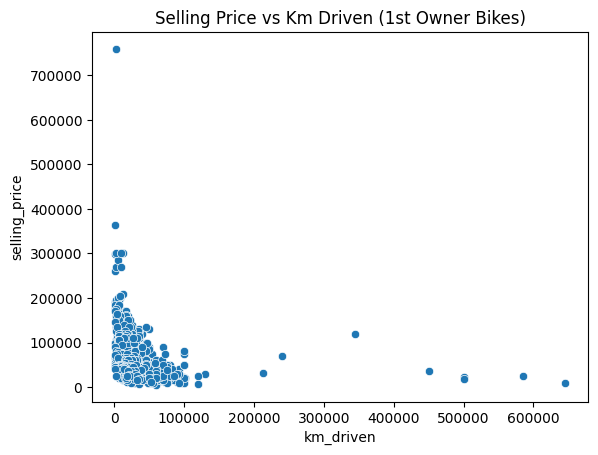

Shape before removing outliers: (1061, 7)
Shape after removing outliers: (1022, 7)


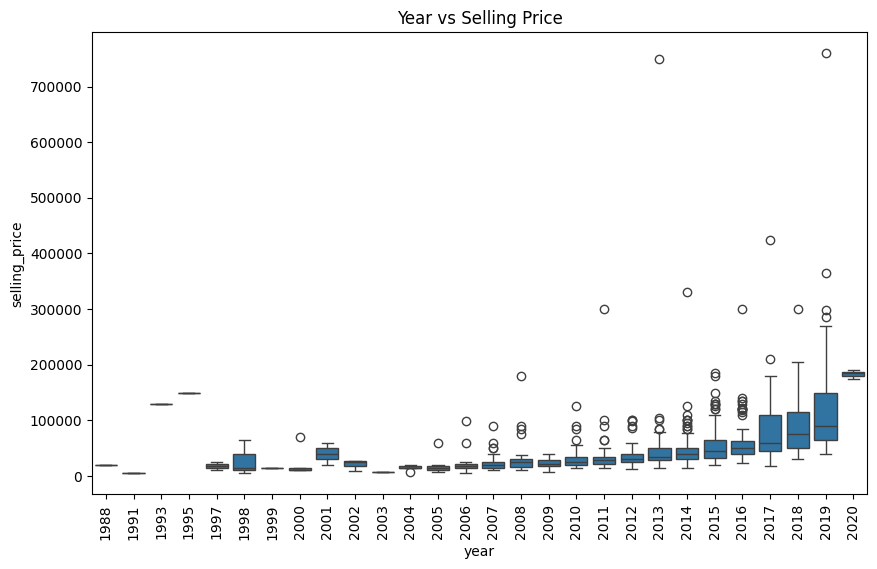

Average depreciation per year (only for valid rows):
2666.5610040950005
Bikes significantly above average price for their year:
                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


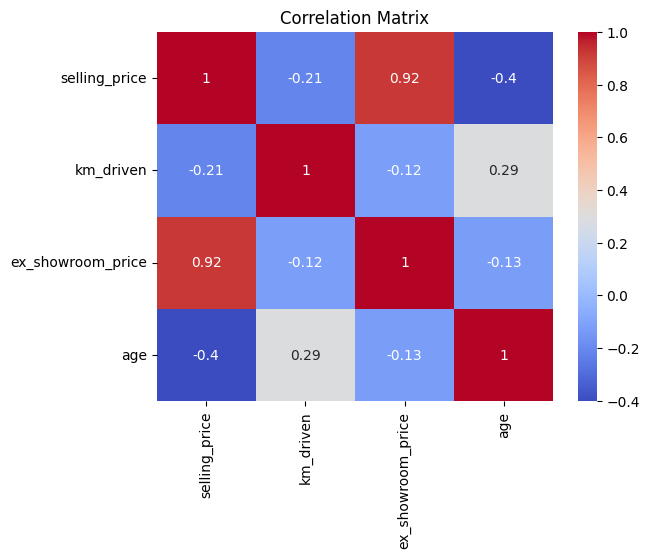

In [5]:
#EDA 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")

# 1. Range of selling prices
print("Range of selling prices:", df['selling_price'].min(), "to", df['selling_price'].max())

# 2. Median selling price
print("Median selling price:", df['selling_price'].median())

# 3. Most common seller type
print("Most common seller type:", df['seller_type'].mode()[0])

# 4. Bikes with > 50,000 km driven
print("Number of bikes driven more than 50,000 km:", (df['km_driven'] > 50000).sum())

# 5. Average km_driven by ownership type
print("Average km_driven by owner type:")
print(df.groupby('owner')['km_driven'].mean())

# 6. Proportion of bikes from 2015 or older
print("Proportion of bikes from 2015 or older:", (df['year'] <= 2015).mean())

# 7. Missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 8. Highest ex_showroom_price and corresponding bike
max_price = df['ex_showroom_price'].max()
bike = df[df['ex_showroom_price'] == max_price]['name'].values[0]
print(f"Highest ex_showroom_price: ₹{max_price} for bike: {bike}")

# 9. Total number of bikes listed by each seller type
print("Bike count by seller type:")
print(df['seller_type'].value_counts())

# 10. Relationship between selling_price and km_driven for first-owner bikes
sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven (1st Owner Bikes)')
plt.show()

# 11. Remove outliers in km_driven using IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))]
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", filtered_df.shape)

# 12. Bivariate analysis: year vs selling_price
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title('Year vs Selling Price')
plt.show()

# 13. Average depreciation based on age
from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['year']
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['age']
print("Average depreciation per year (only for valid rows):")
print(df['depreciation'].dropna().mean())

# 14. Bikes priced significantly above average for their year
yearly_avg = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda x: x['selling_price'] > 1.5 * yearly_avg[x['year']], axis=1)
above_avg_bikes = df[df['above_avg']]
print("Bikes significantly above average price for their year:")
print(above_avg_bikes[['name', 'year', 'selling_price']])

# 15. Correlation matrix and heatmap
corr = df[['selling_price', 'km_driven', 'ex_showroom_price', 'age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Average Price by Dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Par

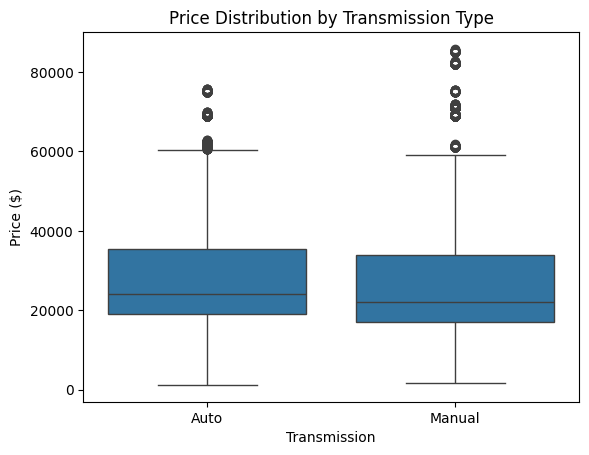

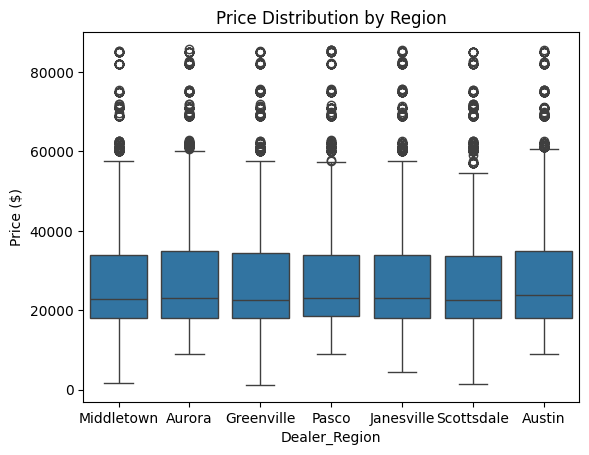

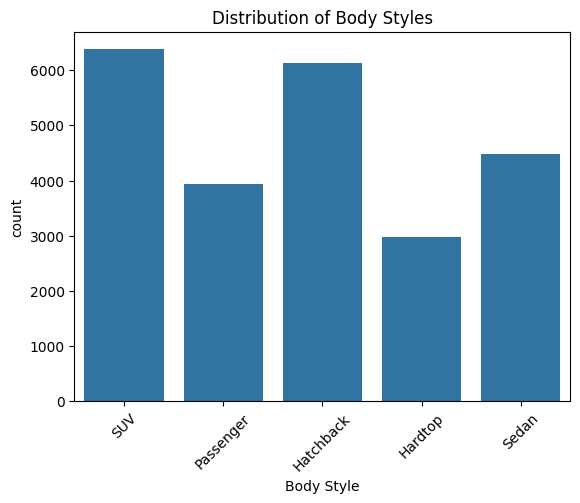

           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207
                       mean  count
Dealer_Region                     
Aurora         28334.626837   3130
Austin         28341.603628   4135
Greenville     28180.819054   3128
Janesville     27833.350955   3821
Middletown     27856.338875   3128
Pasco          28119.039923   3131
Scottsdale     27954.958928   3433
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


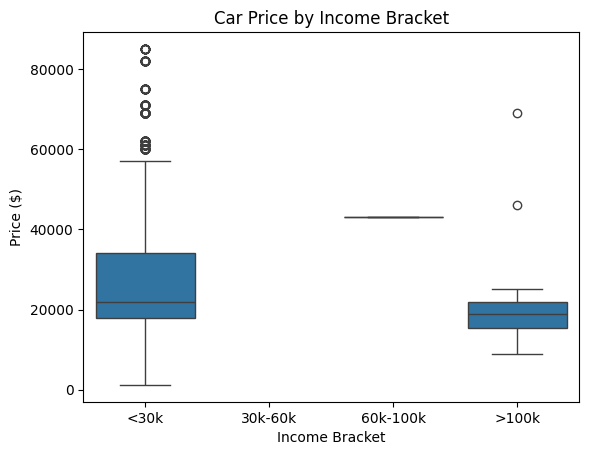

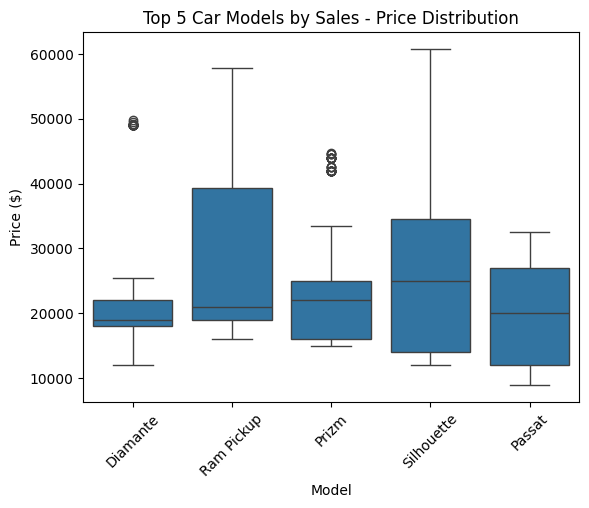

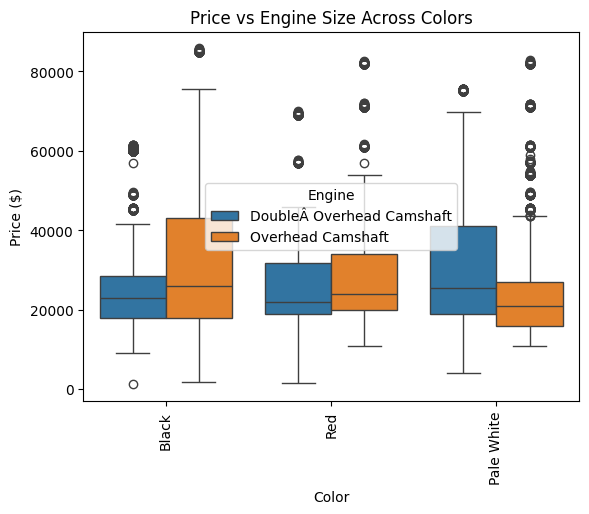

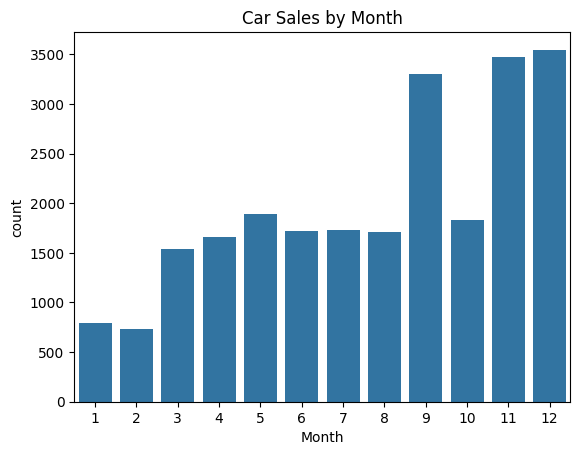

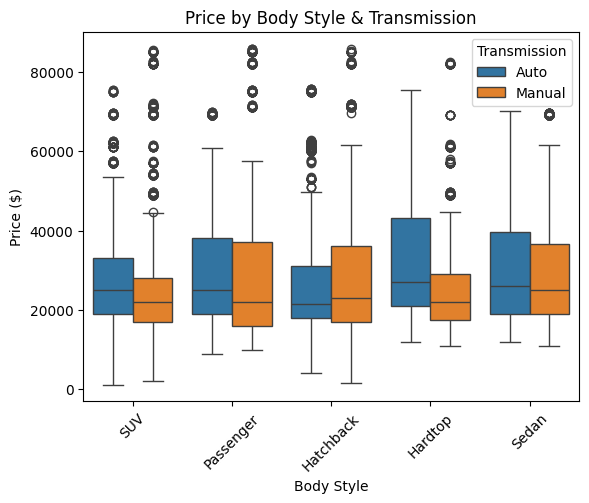

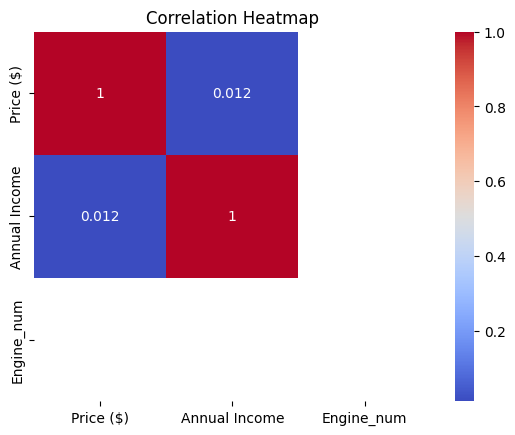

Average Price by Model and Engine:
Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


In [6]:
#EDA - 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Sale.csv")

# Clean column names if needed
df.columns = df.columns.str.strip()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1. Average selling price per dealer
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average Price by Dealer:")
print(avg_price_by_dealer)

# 2. Brand with highest price variation
variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Brand with highest price variation:")
print(variation_by_brand.head(1))

# 3. Price distribution for each transmission type
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Price Distribution by Transmission Type")
plt.show()

# 4. Price distribution across regions
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price Distribution by Region")
plt.show()

# 5. Car count by body style
sns.countplot(data=df, x='Body Style')
plt.title("Distribution of Body Styles")
plt.xticks(rotation=45)
plt.show()

# 6. Avg price by gender and annual income
print(df.groupby('Gender')[['Price ($)', 'Annual Income']].mean())

# 7. Car price & number of sales by region
region_stats = df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])
print(region_stats)

# 8. Avg price by engine size
print(df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False))

# 9. Price variation by income bracket
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 100000, 200000],
                              labels=['<30k', '30k-60k', '60k-100k', '>100k'])
sns.boxplot(data=df, x='Income Bracket', y='Price ($)')
plt.title("Car Price by Income Bracket")
plt.show()

# 10. Top 5 car models by sales count
top_models = df['Model'].value_counts().head(5)
top_model_data = df[df['Model'].isin(top_models.index)]
sns.boxplot(data=top_model_data, x='Model', y='Price ($)')
plt.title("Top 5 Car Models by Sales - Price Distribution")
plt.xticks(rotation=45)
plt.show()

# 11. Price vs engine size across colors
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.title("Price vs Engine Size Across Colors")
plt.xticks(rotation=90)
plt.show()

# 12. Seasonal trend in sales
df['Month'] = df['Date'].dt.month
sns.countplot(data=df, x='Month')
plt.title("Car Sales by Month")
plt.show()

# 13. Price by body style and transmission
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title("Price by Body Style & Transmission")
plt.xticks(rotation=45)
plt.show()

# 14. Correlation heatmap
corr = df[['Price ($)', 'Annual Income']].copy()
# Convert engine to numeric approximation if needed
engine_mapping = {'I4': 4, 'V6': 6, 'V8': 8}
corr['Engine_num'] = df['Engine'].map(engine_mapping)
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 15. Avg price by model and engine
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
print("Average Price by Model and Engine:")
print(avg_price_model_engine.head(10))


Average rating by category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Acce

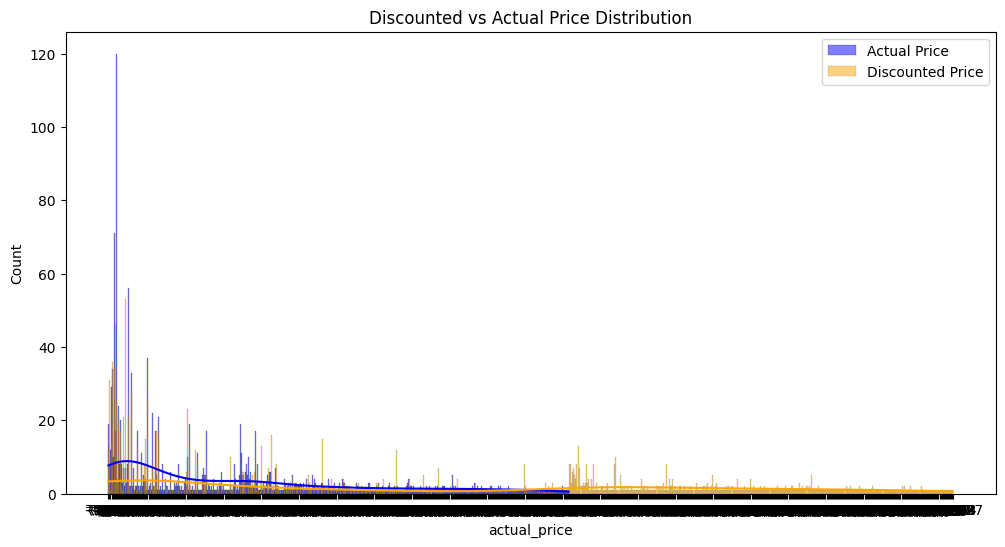


Average discount % by category:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                       

In [12]:
#EDA 3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/amazon.csv")

# Clean up column names if needed
df.columns = df.columns.str.strip()

# 1. Average rating for each product category
# Convert 'rating' column to numeric, handling errors
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # 'coerce' will replace non-numeric values with NaN
avg_rating_by_category = df.groupby("category")["rating"].mean().sort_values(ascending=False)
print("Average rating by category:\n", avg_rating_by_category)

# 2. Top products by rating count in each category
top_rated_by_category = df.loc[df.groupby("category")["rating_count"].idxmax()][["category", "product_name", "rating_count"]]
print("\nTop rating_count products by category:\n", top_rated_by_category)

# ... (rest of your code remains the same)
# 3. Distribution of discounted vs actual prices
plt.figure(figsize=(12,6))
sns.histplot(df["actual_price"], color='blue', label='Actual Price', kde=True)
sns.histplot(df["discounted_price"], color='orange', label='Discounted Price', kde=True)
plt.legend()
plt.title("Discounted vs Actual Price Distribution")
plt.show()

# 4. Average discount % by category
# Convert 'discount_percentage' to numeric by removing '%' and converting to float
df["discount_percentage"] = df["discount_percentage"].str.rstrip("%").astype(float)
avg_discount_by_category = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print("\nAverage discount % by category:\n", avg_discount_by_category)

# 5. Most popular product names (by frequency)
top_products = df["product_name"].value_counts().head(10)
print("\nMost popular product names:\n", top_products)

# 6. Most popular product keywords (if keywords are part of product_name)
# Split product_name into words and count them
from collections import Counter
from itertools import chain

words = chain(*df['product_name'].dropna().str.lower().str.split())
keyword_counts = Counter(words)
print("\nMost common product keywords:\n", keyword_counts.most_common(10))

# 7. Most popular product reviews (most common review titles)
popular_reviews = df["review_title"].value_counts().head(10)
print("\nMost popular review titles:\n", popular_reviews)

# 8. Correlation between discounted price and rating
# Convert 'discounted_price' to numeric, removing currency symbols and commas
df["discounted_price"] = pd.to_numeric(df["discounted_price"].str.replace('₹', '').str.replace(',', ''), errors='coerce')
correlation = df[["discounted_price", "rating"]].corr().iloc[0, 1]
print("\nCorrelation between discounted_price and rating:", correlation)

# 9. Top 5 categories with highest average ratings
top_categories = avg_rating_by_category.head(5)
print("\nTop 5 categories with highest ratings:\n", top_categories)

# 10. Suggestions for optimization based on analysis
print("\n🔍 Optimization Suggestions:")
if correlation < 0:
    print("- Higher discounts may slightly reduce perceived quality (negative correlation with rating).")
else:
    print("- Positive correlation found between discount and rating — explore further for strategic pricing.")
if avg_discount_by_category.mean() > 30:
    print("- Average discounts are high — evaluate pricing strategy to improve margins.")
if top_products.iloc[0] > 10:
    print("- Popular products might benefit from sponsored placement or stock prioritization.")

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicates: 27


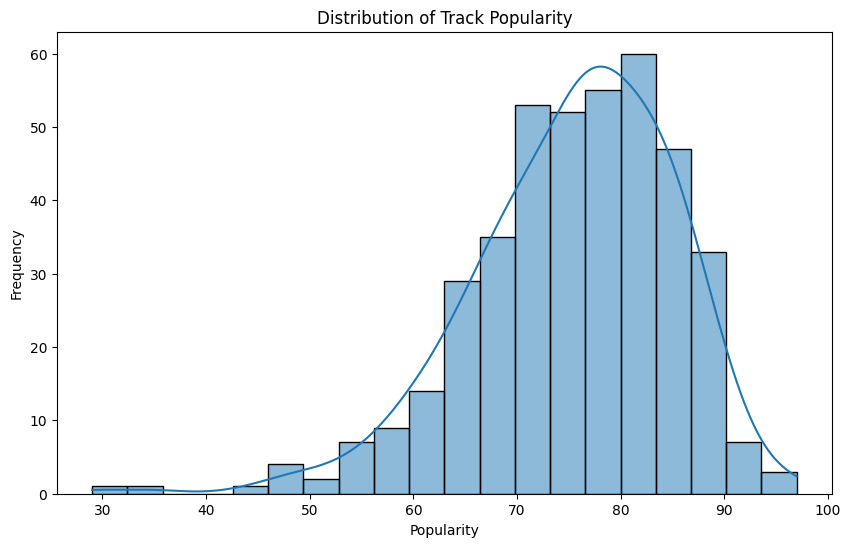

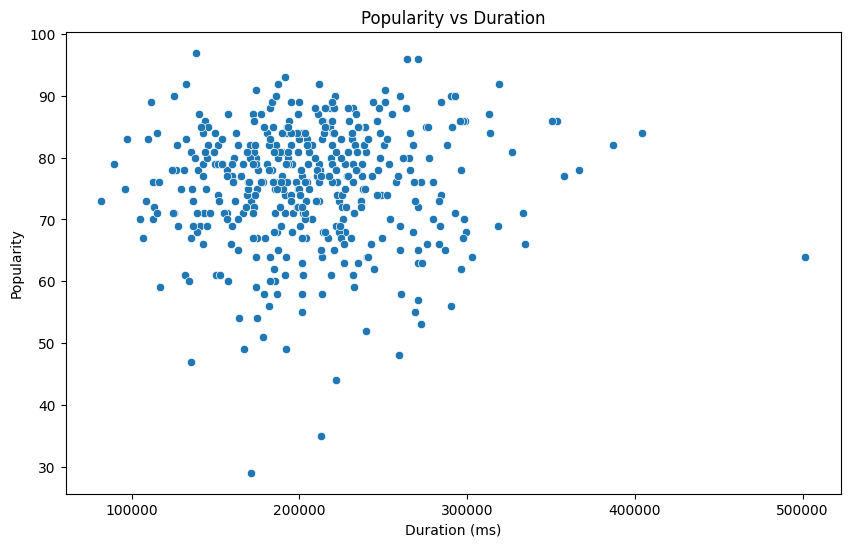


Artist with most tracks: Drake


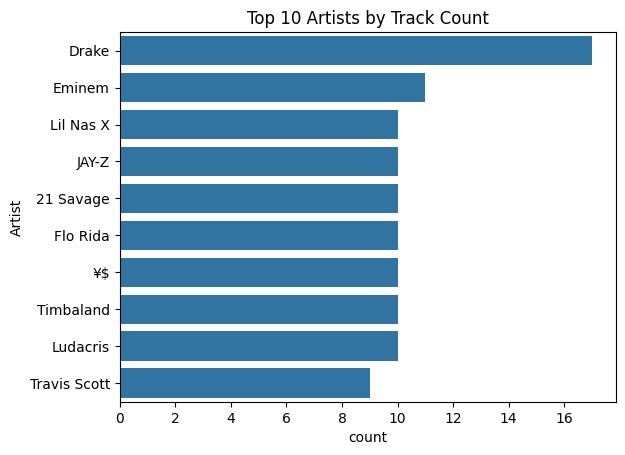


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Top 5 Most Popular Artists (Avg. Popularity):
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Most Popular Tracks by Top 5 Artists:
            Artist                    Track Name  Popularity
260            ¥$                      CARNIVAL          96
30   Travis Scott    FE!N (feat. Playboi Carti)          93
140         cassö                         Prada          92
241        Trueno  Mamichula - con Nicki Nicole          89
200  David Guetta            Baby 

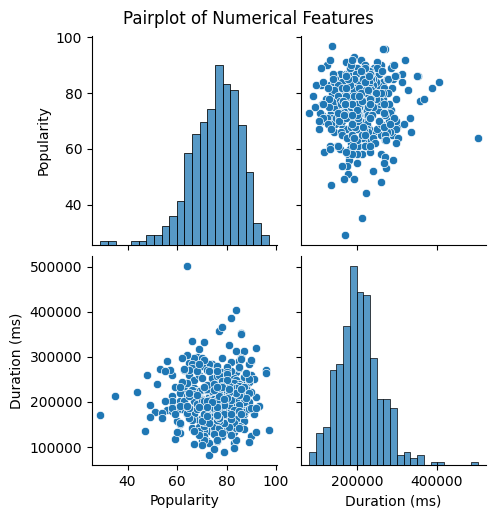

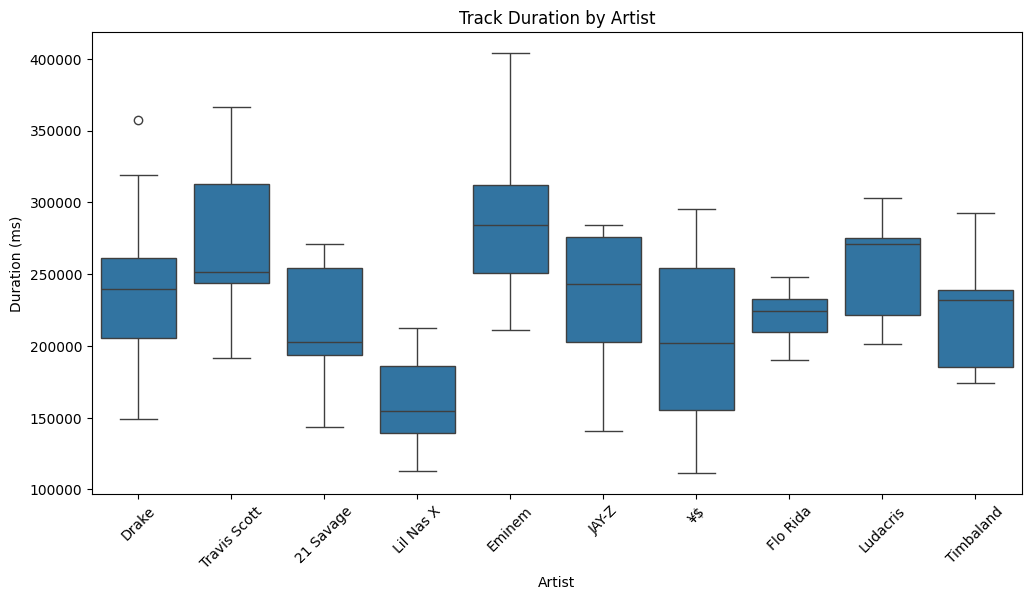

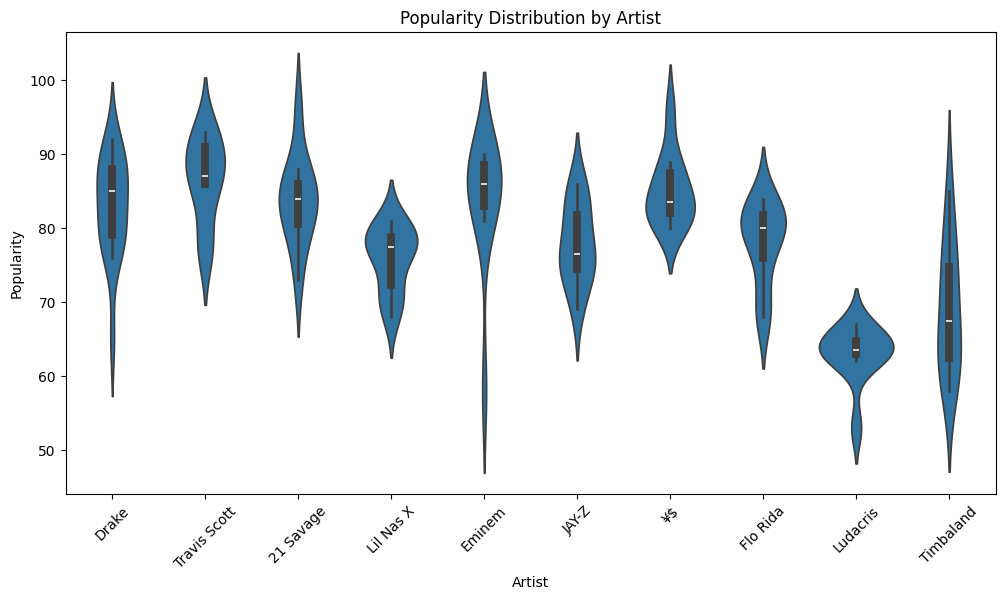

In [13]:
#EDA 4

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# 1. Check for nulls and duplicates
print("Null values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# 2. Distribution of popularity
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# 3. Relationship between popularity and duration
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title("Popularity vs Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

# 4. Artist with the highest number of tracks
artist_counts = df['Artist'].value_counts()
print("\nArtist with most tracks:", artist_counts.idxmax())
sns.countplot(y='Artist', data=df, order=artist_counts.head(10).index)
plt.title("Top 10 Artists by Track Count")
plt.show()

# 5. Top 5 least popular tracks
least_popular = df.sort_values(by='Popularity').head(5)
print("\nTop 5 Least Popular Tracks:\n", least_popular[['Artist', 'Track Name', 'Popularity']])

# 6. Top 5 most popular artists by average popularity
top_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Most Popular Artists (Avg. Popularity):\n", top_artists)

# 7. Most popular tracks from top 5 artists
top_artist_names = top_artists.index.tolist()
popular_tracks = df[df['Artist'].isin(top_artist_names)]
most_popular_tracks = popular_tracks.sort_values('Popularity', ascending=False).drop_duplicates('Artist')
print("\nMost Popular Tracks by Top 5 Artists:\n", most_popular_tracks[['Artist', 'Track Name', 'Popularity']])

# 8. Pairplot of numerical features
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# 9. Duration variation by artist (Top 10)
top_10_artists = df['Artist'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top_10_artists)], x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.title("Track Duration by Artist")
plt.show()

# 10. Popularity distribution by artist (Top 10)
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_10_artists)], x='Artist', y='Popularity')
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Artist")
plt.show()
